<a href="https://colab.research.google.com/github/sophdaya/DataScience_SophieDAYA_MathiasHABERLI/blob/main/DataInvestigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import


In [1]:
!pip install openpyxl scikit-learn pandas matplotlib seaborn --quiet


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
training_data = pd.read_excel("/content/drive/MyDrive/Thèse 2/training_data_all_countries_final.xlsx")

In [6]:
training_data.columns

Index(['source_country', 'exporter', 'destination', 'trade_volume_t',
       'trade_value_usd'],
      dtype='object')

In [7]:
training_data = training_data.rename(columns={
    'country_of_production':  'source_country',
    'exporter_group':         'exporter',
    'country_of_destination': 'destination',
    'volume':                 'trade_volume_t',
    'fob':                    'trade_value_usd'
})


print(training_data.columns.tolist())


['source_country', 'exporter', 'destination', 'trade_volume_t', 'trade_value_usd']


In [8]:
# Garde les colonnes pertinentes du training set
X = training_data[["source_country", "exporter", "destination", "trade_value_usd"]].copy()
y = training_data["trade_volume_t"].copy()

In [9]:
df_DO = pd.read_excel("/content/drive/MyDrive/Thèse/DO_2021.xlsx")
# Préparer le jeu de prédiction (DO 2021)
df_DO_model = df_DO.rename(columns={
    "partnerDesc": "destination",
    "fobvalue": "trade_value_usd"
})

df_DO_model["source_country"] = "Dominican Republic"
df_DO_model["exporter"] = "unknown"

# Ne garder que les colonnes nécessaires
X_DO = df_DO_model[["source_country", "exporter", "destination", "trade_value_usd"]].copy()

In [10]:
X["is_prediction"] = False
X_DO["is_prediction"] = True

X_all = pd.concat([X, X_DO], ignore_index=True)

# One-hot encoding des colonnes catégorielles
X_all_encoded = pd.get_dummies(X_all, columns=["source_country", "exporter", "destination"])


In [11]:

X_train_encoded = X_all_encoded[X_all_encoded["is_prediction"] == False].drop(columns="is_prediction")
X_DO_encoded = X_all_encoded[X_all_encoded["is_prediction"] == True].drop(columns="is_prediction")


X_train_encoded = X_train_encoded.astype(float)
X_DO_encoded = X_DO_encoded.astype(float)

print("X_train_encoded shape:", X_train_encoded.shape)
print("X_DO_encoded shape:", X_DO_encoded.shape)
print("y shape:", y.shape)



X_train_encoded shape: (2523, 848)
X_DO_encoded shape: (48, 848)
y shape: (2523,)


In [12]:
from sklearn.model_selection import train_test_split

# Division en 80% entraînement et 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_train_encoded, y, test_size=0.2, random_state=42
)

# Affichage des formes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (2018, 848)
X_test shape : (505, 848)
y_train shape: (2018,)
y_test shape : (505,)


In [13]:
training_data.groupby("source_country")[["trade_value_usd", "trade_volume_t"]].corr().iloc[0::2,-1]


,,trade_volume_t
source_country,,
COLOMBIA,trade_value_usd,0.996516
COTE D'IVOIRE,trade_value_usd,0.992663
ECUADOR,trade_value_usd,0.990092
GHANA,trade_value_usd,0.506314
INDONESIA,trade_value_usd,0.019448
PERU,trade_value_usd,0.986009


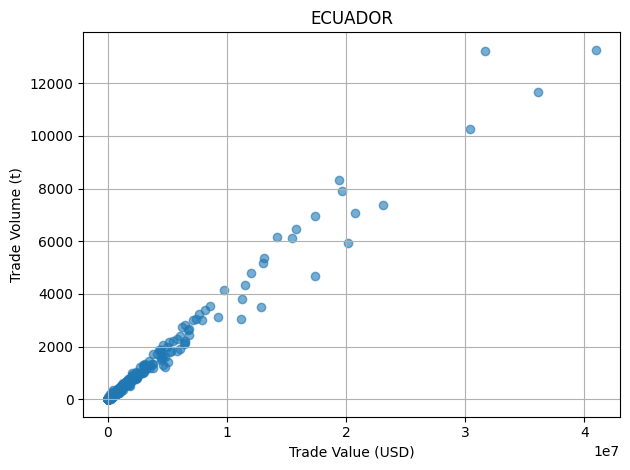

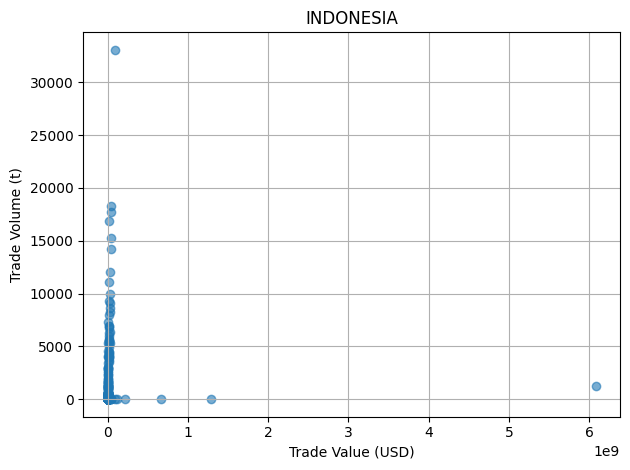

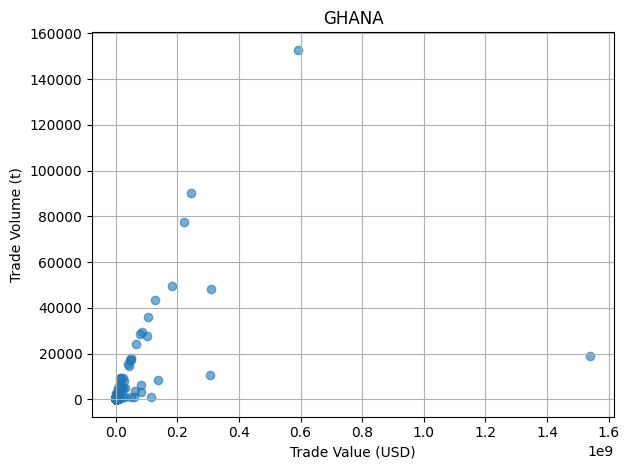

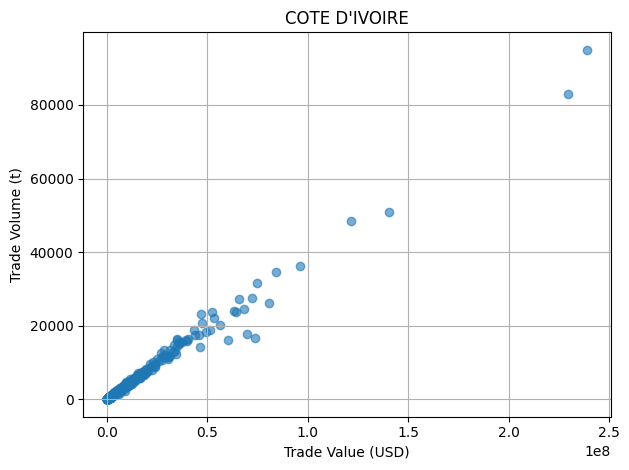

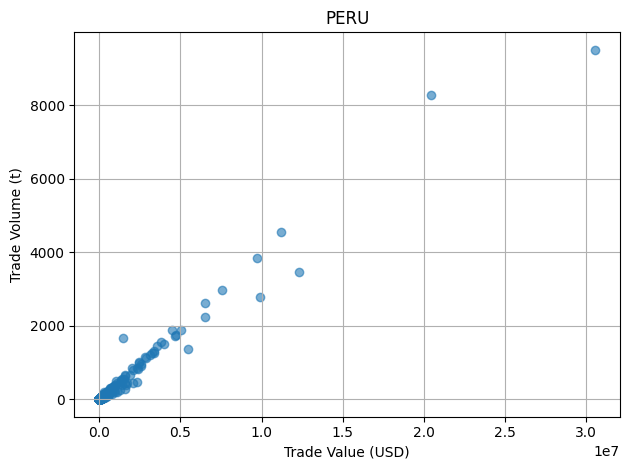

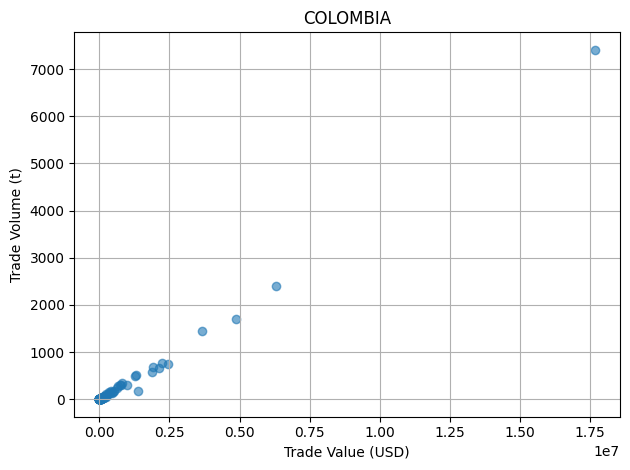

In [14]:
import matplotlib.pyplot as plt


for country in training_data['source_country'].unique():
    df = training_data[training_data['source_country'] == country]

    plt.figure()
    plt.scatter(df['trade_value_usd'], df['trade_volume_t'], alpha=0.6)
    plt.title(f'{country}')
    plt.xlabel('Trade Value (USD)')
    plt.ylabel('Trade Volume (t)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Corrélation de Spearman (corrélation de Pearson appliqué aux rangs de donnnées)

"The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the rank variables." - wikipedia

In [15]:
from scipy.stats import spearmanr
spearman_corr = (
    training_data
      .groupby("source_country")[["trade_value_usd", "trade_volume_t"]]
      .corr(method="spearman")
      .iloc[0::2, -1]
      .rename("spearman_corr")
)

print(spearman_corr)

source_country                 
COLOMBIA        trade_value_usd    0.984305
COTE D'IVOIRE   trade_value_usd    0.997193
ECUADOR         trade_value_usd    0.988569
GHANA           trade_value_usd    0.948590
INDONESIA       trade_value_usd    0.824992
PERU            trade_value_usd    0.987011
Name: spearman_corr, dtype: float64


Colonnes du DataFrame : ['source_country', 'exporter', 'destination', 'trade_volume_t', 'trade_value_usd']
Nombre de lignes pour INDONESIA : 362


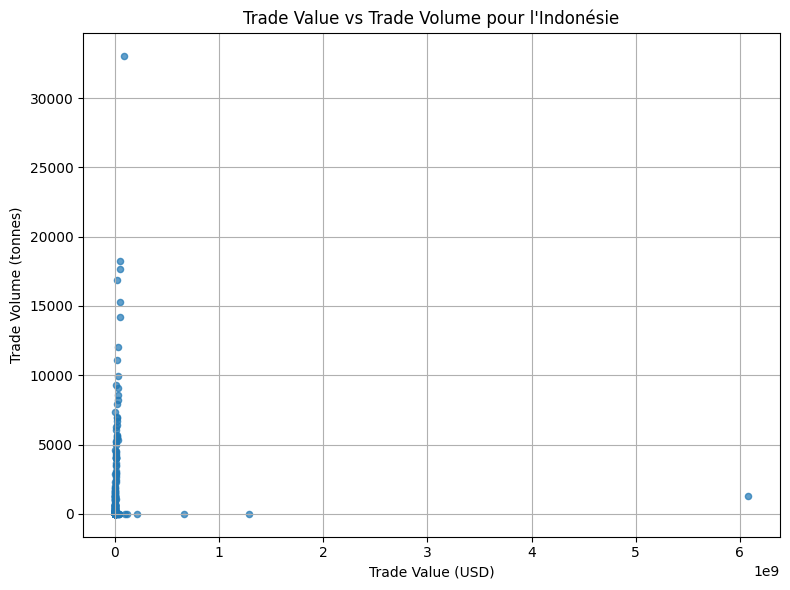

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/content/drive/MyDrive/Thèse 2/training_data_all_countries_final.xlsx"


df = pd.read_excel(file_path)


print("Colonnes du DataFrame :", df.columns.tolist())


df['source_country_norm'] = df['source_country'].str.strip().str.upper()
df_idn = df[df['source_country_norm'] == 'INDONESIA']


print(f"Nombre de lignes pour INDONESIA : {len(df_idn)}")


plt.figure(figsize=(8, 6))
plt.scatter(df_idn['trade_value_usd'], df_idn['trade_volume_t'], s=20, alpha=0.7)
plt.xlabel('Trade Value (USD)')
plt.ylabel('Trade Volume (tonnes)')
plt.title("Trade Value vs Trade Volume pour l'Indonésie")
plt.grid(True)
plt.tight_layout()
plt.show()


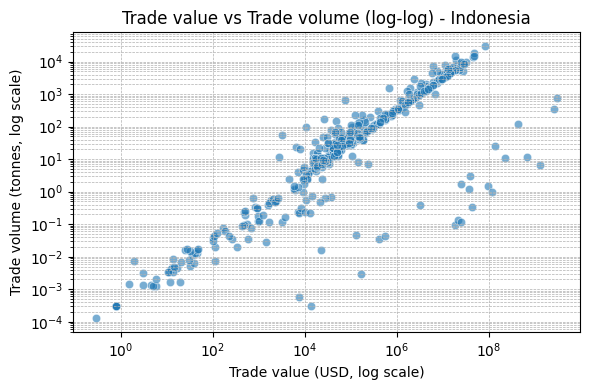

In [21]:
indonesia_dataset = pd.read_excel("/content/drive/MyDrive/Thèse/indonesia_cocoa_v0_1_0-2_INVESTIGATION.xlsx")
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=indonesia_dataset,
    x="Trade value",
    y="Trade volume",
    alpha=0.6
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Trade value (USD, log scale)")
plt.ylabel("Trade volume (tonnes, log scale)")
plt.title("Trade value vs Trade volume (log-log) - Indonesia")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()
